# Logistic Regression in Machine Learning 

Logistic Regression is a statistical analysis method used to predict the outcome of a binary variable based on one or more predictor variables. It is used widely in fields such as medicine, finance, and social sciences where the outcomes are typically in the form of 'yes/no', 'success/failure', etc.

The output of logistic regression is the probability that the target variable belongs to a particular category. Mathematically, logistic regression estimates the probabilities using a logistic function, which is the sigmoid function 
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


where $z$ is the linear combination of the input features $x$ weighted by the coefficients $\beta$:

$$
z = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n
$$

#### **Mathematical Model**

The logistic regression model creates a probability distribution over binary outcomes, where:

$$
P(Y = 1 | X = x) = \sigma(\beta_0 + \beta_1x_1 + ... + \beta_nx_n)
$$

The model aims to find the best-fitting parameters $\beta$ to describe the relationship between the dependent variable and the independent variables.

#### Application to Machine Learning: An Example to Predict Heart Disease
To demonstrate the application of logistic regression in Machine Learning, we are going to explore a dataset from Kaggle that contains an ongoing cardiovascular study on residents from Framingham, Massachussetts. 

The goal is to predict whether the patient has a 10 year risk of futur coronary heart disease (CHD) with the dataset given. The dataset includes over 4,000 records and 15 attributes. 

In [39]:
import pandas as pd

# Load data
df = pd.read_csv('HeartDisease.csv')

# Display the first few rows of the dataframe
df.head(50)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [40]:
# Let's explore the data a bit to see what we're working with
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [42]:
df.shape

(4238, 16)

In [43]:
# Checking for missing values
df.isnull().sum().sort_values(ascending=False)

glucose            388
education          105
BPMeds              53
totChol             50
cigsPerDay          29
BMI                 19
heartRate            1
male                 0
age                  0
currentSmoker        0
prevalentStroke      0
prevalentHyp         0
diabetes             0
sysBP                0
diaBP                0
TenYearCHD           0
dtype: int64

#### Data Preparation

In [44]:
# We assume that empty cigarette values are 0 so we fill NA values with 0
df['cigsPerDay'] = df['cigsPerDay'].fillna(0)

# We assume that empty BPMeds (blood pressure meds) values are 0 so we fill NA values with 0
df['BPMeds'] = df['BPMeds'].fillna(0)

# Fill missing values with median for numerical columns that are still missing
df.fillna(df.median(), inplace=True)

# Normalize or standardize the numerical data to aid convergence of the model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [45]:
#Since the education attribute is not a health factor, we can drop it
df.drop('education', axis=1, inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.234951,0,-0.751322,0.0,0,0,0,-0.940600,-1.195907,-1.082625,0.287379,0.342761,-0.201359,0
1,0,-0.418257,0,-0.751322,0.0,0,0,0,0.300313,-0.515187,-0.158988,0.719752,1.590291,-0.245099,0
2,1,-0.184916,1,0.929210,0.0,0,0,0,0.187503,-0.220209,-0.242955,-0.113057,-0.073082,-0.507537,0
3,0,1.331800,1,1.769476,0.0,0,1,0,-0.263739,0.800871,1.016549,0.682902,-0.904768,0.935872,1
4,0,-0.418257,1,1.181289,0.0,0,0,0,1.089985,-0.106755,0.092912,-0.663350,0.758605,0.148558,0


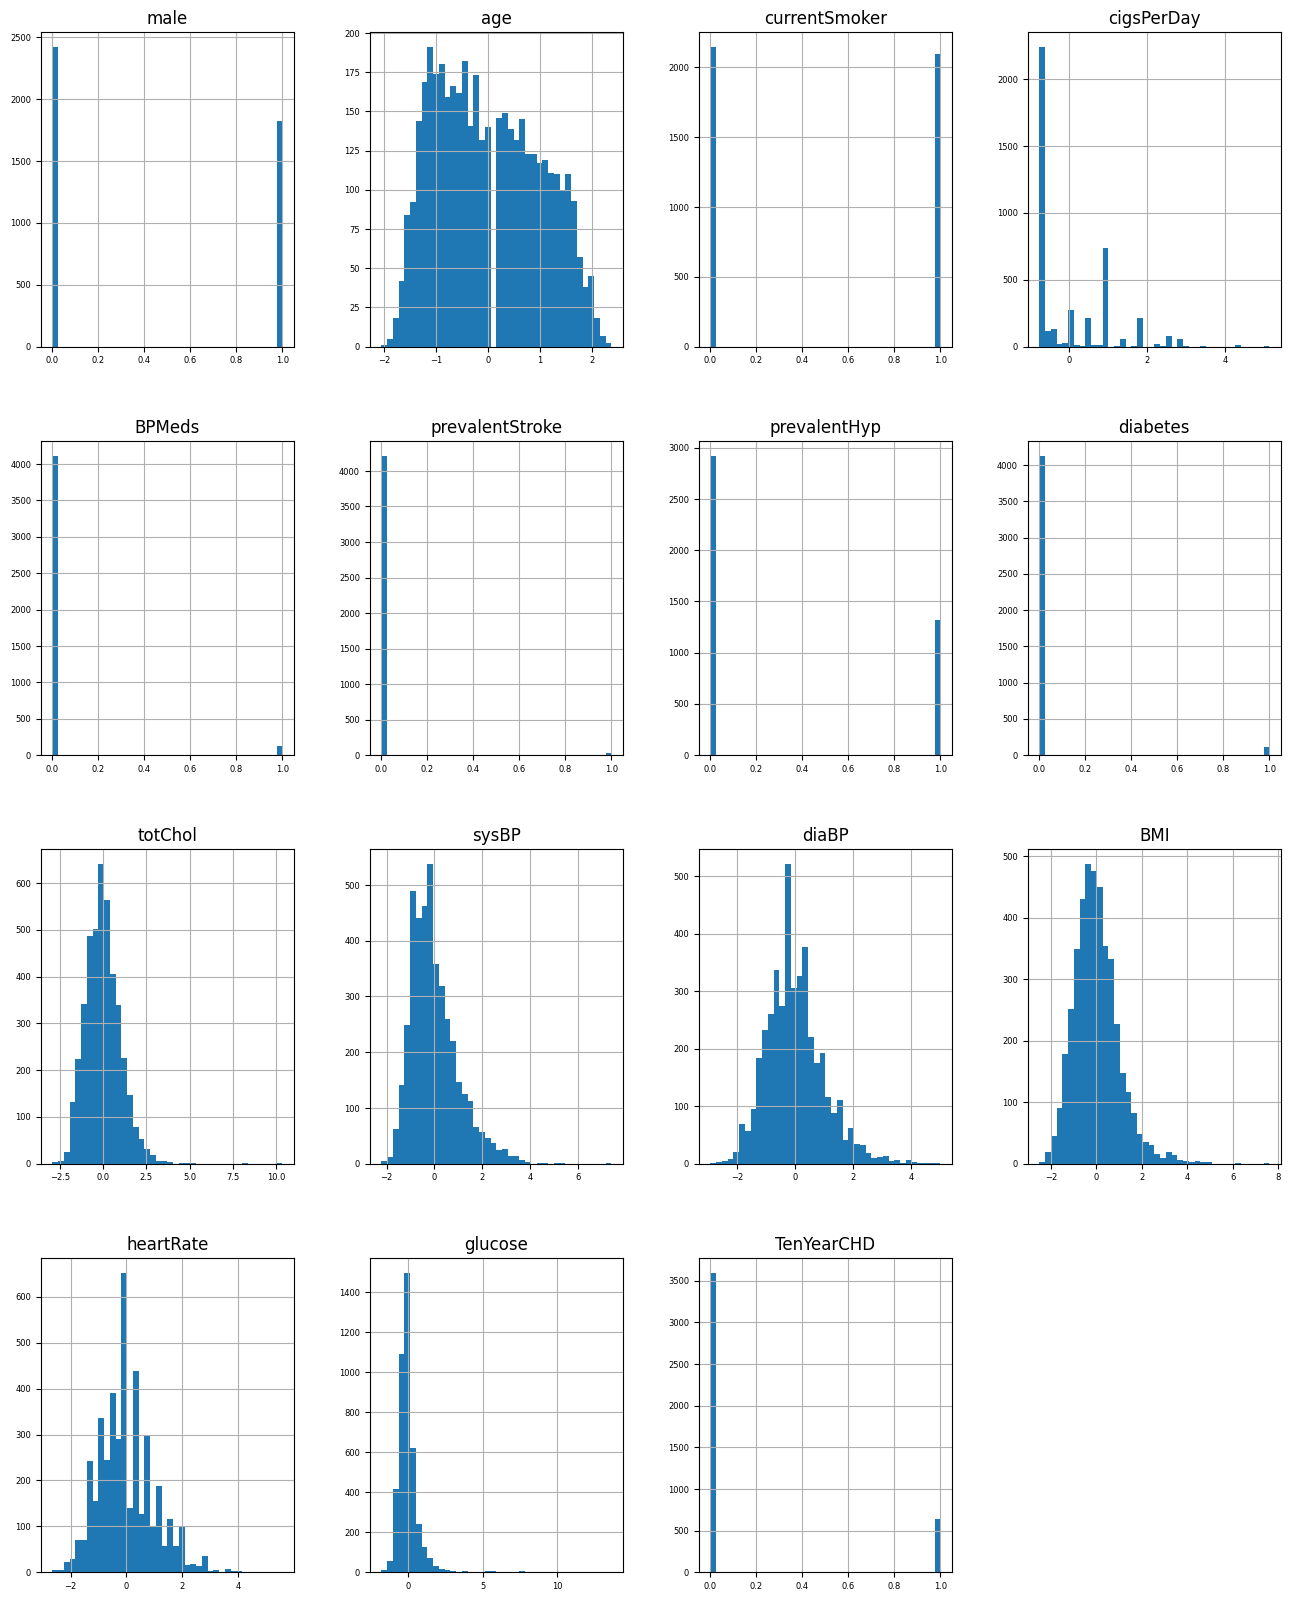

In [46]:
#Let's plot the distribution of all variables
df.hist(figsize=(16, 20), bins=40, xlabelsize=6, ylabelsize=6);


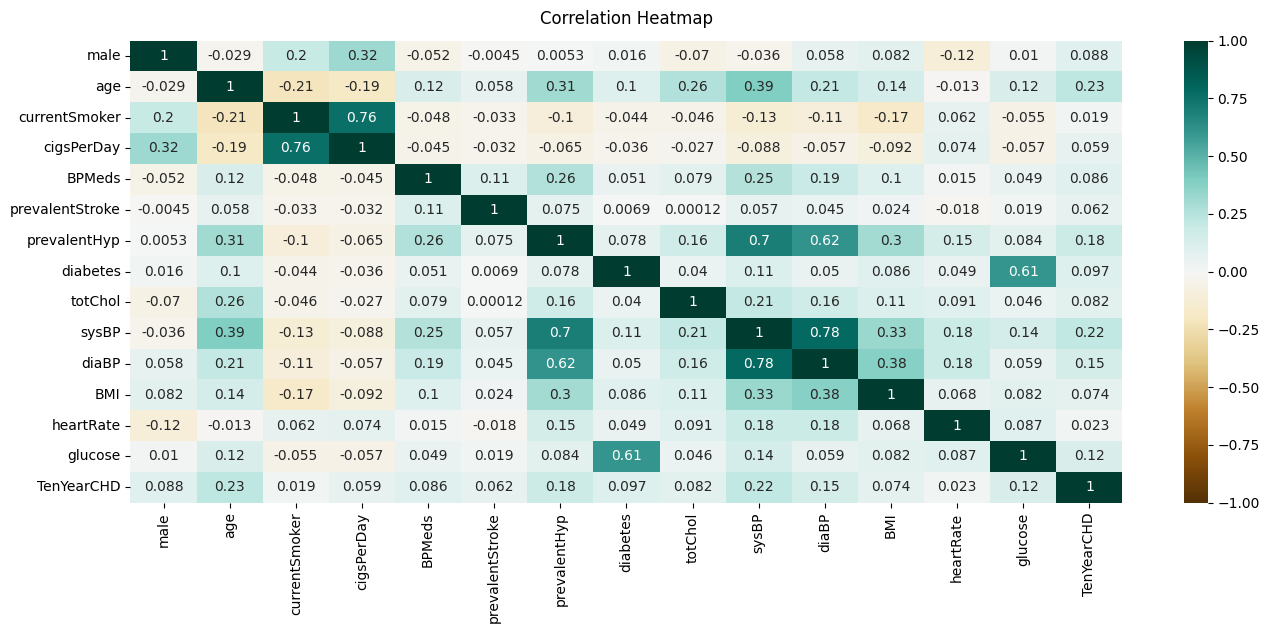

In [47]:
#Check correlation between all features
import seaborn as sns  
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);



#### Data Splitting and Model Training

In [48]:
# Split the data into features and target label
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Build and train the model
from sklearn.linear_model import LogisticRegression

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

#### Model Evaluation

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on the testing set
y_pred = model.predict(X_test)

# Print out the model evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8573113207547169
Confusion Matrix:
 [[718   6]
 [115   9]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



                 Coefficient
male                0.423402
age                 0.568417
currentSmoker      -0.040831
cigsPerDay          0.288710
BPMeds              0.245784
prevalentStroke     0.751706
prevalentHyp        0.196244
diabetes            0.010322
totChol             0.040702
sysBP               0.303023
diaBP               0.024439
BMI                -0.024097
heartRate          -0.067386
glucose             0.187347


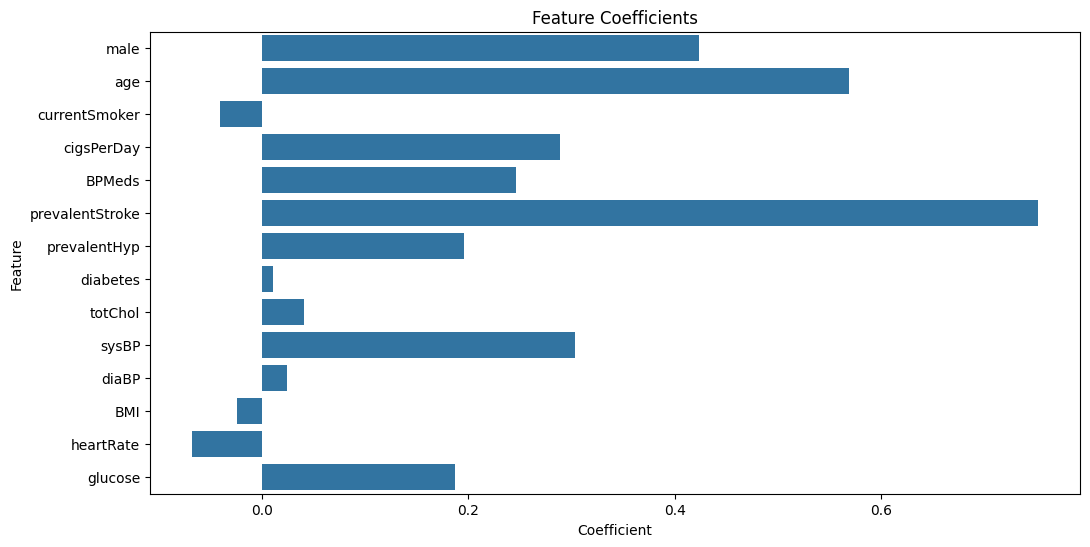

In [54]:
#Let's print out the coefficients of the model
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coefficient'])
print(coefficients)

#Let's plot the coefficients
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='index', data=coefficients.reset_index())
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Coefficients')
plt.show()






From these coefficients the model got we can interpret the following: 
* age (0.568417): For each additional year of age, the log odds of having heart disease increase by 0.568.
* cigsPerDay (0.288710): Each additional cigarette smoked per day increases the log odds of having heart disease by 0.289.
* The negative coefficient for currentSmoker indicates there might another value that's capturing the risk for disease, for example cigsperday
* The value 0.187347 means that for each one-unit increase in glucose level, the log odds of having heart disease increase by 0.187347.

It is important to note that to convert from log odds to odds ratio for easier reference and it is given by the formula:
To make these interpretations more intuitive, you can convert log odds to odds ratios by exponentiating the coefficients:

$$
\text{Odds Ratio} = e^{\text{Coefficient}}
$$

This tells you how the odds of the outcome multiply for a one-unit increase in the predictor. For example, an age coefficient of 0.568417 translates to an odds ratio of 

$$
e^{0.568417}$$

 indicating that each additional year of age multiplies the odds of having heart disease by this factor.



In [56]:
#Let's conver the coefficients to odds ratio
import numpy as np
coefficients['Odds Ratio'] = coefficients['Coefficient'].apply(lambda x: np.exp(x))
print(coefficients)


                 Coefficient  Odds Ratio
male                0.423402    1.527147
age                 0.568417    1.765470
currentSmoker      -0.040831    0.959992
cigsPerDay          0.288710    1.334704
BPMeds              0.245784    1.278623
prevalentStroke     0.751706    2.120616
prevalentHyp        0.196244    1.216824
diabetes            0.010322    1.010376
totChol             0.040702    1.041541
sysBP               0.303023    1.353946
diaBP               0.024439    1.024740
BMI                -0.024097    0.976191
heartRate          -0.067386    0.934834
glucose             0.187347    1.206045


Here we can see how much the odds for getting heart disease increase (or decrease) depending on the coefficient, for example we can see that having a prevalent stroke increases the odds for heart disease in 212%.

# In Conclusion
In this walkthrough, we've explored how logistic regression can be applied to predict heart disease using a dataset of various health indicators. We began with an introduction to logistic regression, covering its mathematical foundations and how it estimates probabilities using the logistic function. Following this, we delved into practical implementation, involving loading and preparing the data, addressing missing values, standardizing features, and finally splitting the data into training and testing sets.